In [1]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
# matplotlib
plt.figure(figsize = (8,8))

In [2]:
#https://github.com/GeorgeMcIntire/fake_real_news_dataset
# https://s3.amazonaws.com/assets.datacamp.com/blog_assets/fake_or_real_news.csv
#https://www.datacamp.com/community/tutorials/scikit-learn-fake-news

datacamp_news = pd.read_csv("./data_camp_news_fake_or_real.csv")
del datacamp_news["Unnamed: 0"]
print datacamp_news.shape
datacamp_news.head()
datacamp_news = datacamp_news[datacamp_news.text != " "]


(6335, 3)


In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# clean data

# doc_complete = datacamp_news.title
# from nltk.corpus import stopwords 
# from nltk.stem.wordnet import WordNetLemmatizer
# import string
# stop = set(stopwords.words('english'))
# exclude = set(string.punctuation) 
# lemma = WordNetLemmatizer()
# def clean(doc):
#     stop_free = " ".join([i.decode('ascii', "ignore") for i in doc.lower().split() if i not in stop])
#     punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
#     normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
#     return normalized

# doc_clean = [clean(doc) for doc in doc_complete]

In [8]:
# split data
doc_clean = datacamp_news.text
from sklearn.cross_validation import train_test_split
X_train, X_test,y_train, y_test = train_test_split(doc_clean, datacamp_news.label, test_size = .33)

In [12]:
# tfidf model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=no_features, stop_words='english')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

tfidf_test = tfidf_vectorizer.transform(X_test)


tfidf_traindf = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_testdf = pd.DataFrame(tfidf_test.A, columns = tfidf_vectorizer.get_feature_names())

accuracy:   0.845
Confusion matrix, without normalization


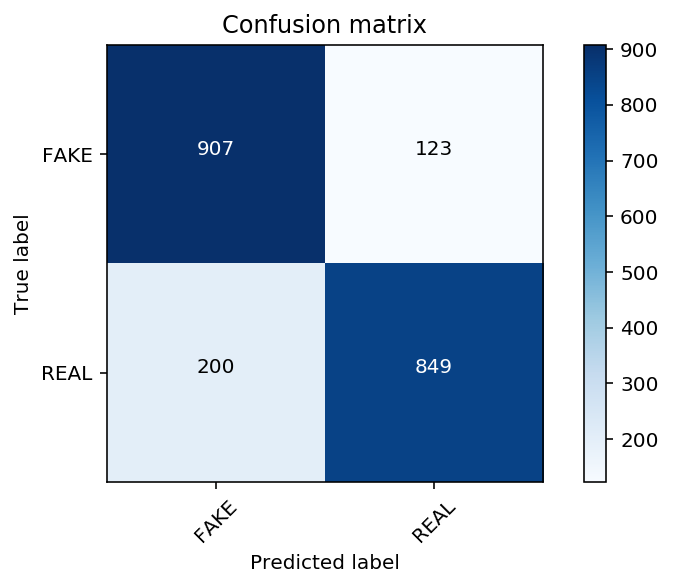

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB() 

clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.894
Confusion matrix, without normalization


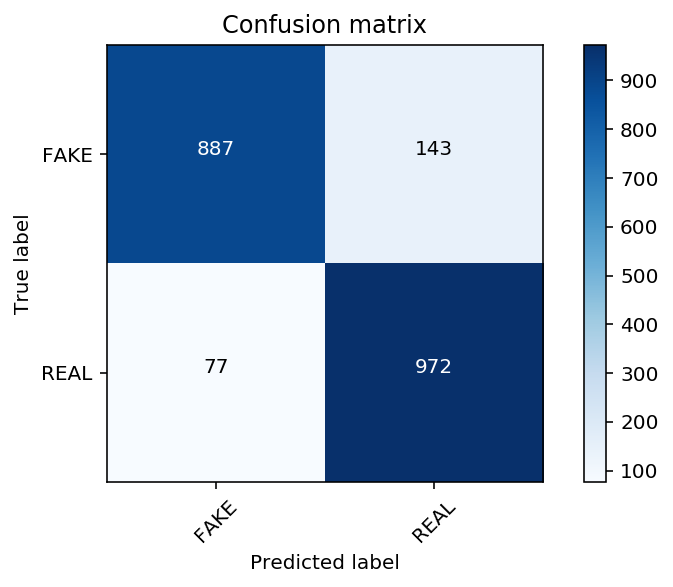

In [24]:
# tfidf model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 
# Transform the test set 
count_test = count_vectorizer.transform(X_test)


count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.899
Confusion matrix, without normalization


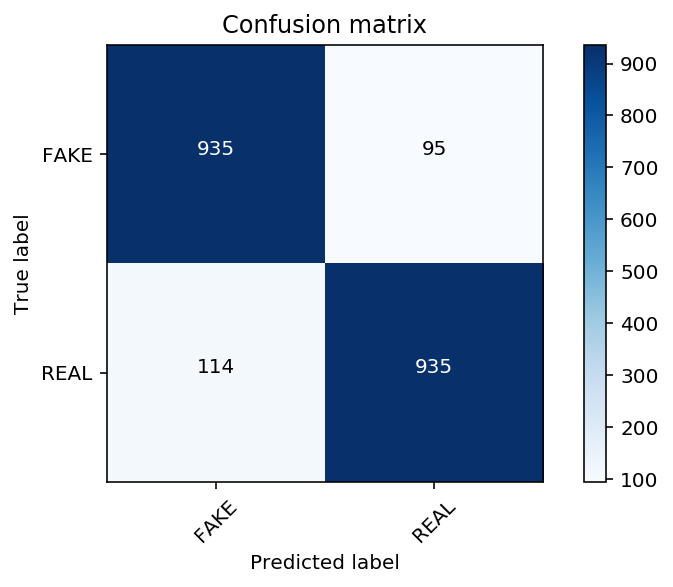

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression()
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.908
Confusion matrix, without normalization


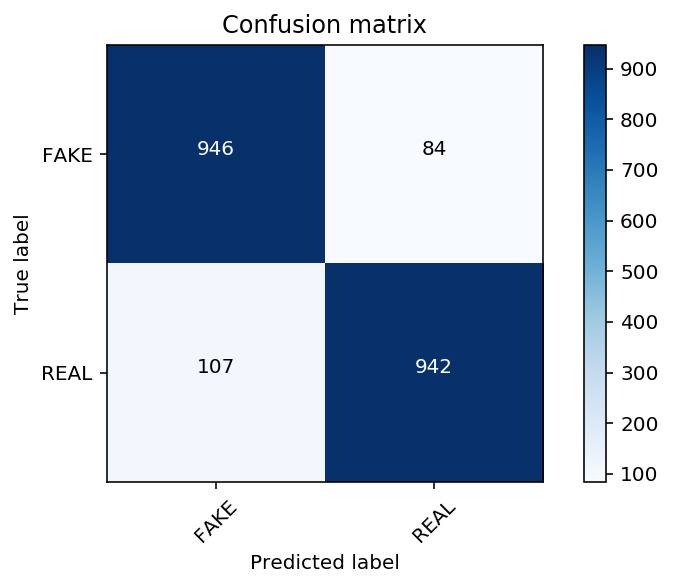

In [27]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [43]:
clf.predict_proba(count_test)

array([[9.99930829e-01, 6.91708626e-05],
       [7.81591845e-01, 2.18408155e-01],
       [1.42267075e-07, 9.99999858e-01],
       ...,
       [9.92982601e-01, 7.01739919e-03],
       [4.33624168e-02, 9.56637583e-01],
       [2.14594985e-01, 7.85405015e-01]])

In [11]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

documents = datacamp_news.text

no_features = 1000


# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 20

nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10

/Users/Stav/anaconda2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [10]:
tfidf.A

<6299x1000 sparse matrix of type '<type 'numpy.float64'>'
	with 710571 stored elements in Compressed Sparse Row format>

In [12]:
tfidf_df = pd.DataFrame(tfidf.A, columns=tf_feature_names)
tfidf_df

000        10       100        11        12        13        14  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.051897  0.000000  0.000000  0.055265  0.000000  0.000000  0.000000   
4     0.000000  0.052064  0.000000  0.000000  0.000000  0.000000  0.000000   
5     0.000000  0.022873  0.000000  0.074752  0.000000  0.000000  0.000000   
6     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8     0.000000  0.010045  0.000000  0.010943  0.000000  0.000000  0.014432   
9     0.062377  0.060974  0.000000  0.033212  0.000000  0.000000  0.000000   
10    0.000000  0.000000  0.059649  0.000000  0.000000  0.000000  0.000000   
11    0.000000  0.000000  0.000000  0.000000  0.000000  0.063075  0.000000   
12    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
13    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15    0.000000  0.017497  0.022833  0.019062  0.011179  0.012618  0.012570   
16    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
17    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19    0.000000  0.152892  0.000000  0.000000  0.000000  0.000000  0.000000   
20    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21    0.000000  0.000000  0.000000  0.000000  0.000000  0.284073  0.000000   
22    0.039738  0.000000  0.000000  0.042316  0.000000  0.000000  0.000000   
23    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.035443   
24    0.000000  0.000000  0.051564  0.000000  0.000000  0.000000  0.000000   
25    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
26    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
28    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
29    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
6269  0.306382  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6270  0.000000  0.000000  0.172761  0.000000  0.000000  0.000000  0.000000   
6271  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6272  0.000000  0.102552  0.000000  0.000000  0.000000  0.000000  0.000000   
6273  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6274  0.000000  0.011274  0.029424  0.000000  0.000000  0.000000  0.000000   
6275  0.000000  0.000000  0.000000  0.000000  0.036384  0.000000  0.000000   
6276  0.000000  0.000000  0.000000  0.033946  0.039817  0.000000  0.000000   
6277  0.000000  0.000000  0.047531  0.039679  0.000000  0.000000  0.000000   
6278  0.029870  0.029198  0.000000  0.000000  0.000000  0.000000  0.000000   
6279  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6280  0.000000  0.039557  0.000000  0.064640  0.025274  0.028527  0.000000   
6281  0.000000  0.000000  0.000000  0.030532  0.000000  0.000000  0.000000   
6282  0.000000  0.000000  0.000000  0.224912  0.000000  0.000000  0.000000   
6283  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6284  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6285  0.000000  0.000000  0.061835  0.000000  0.000000  0.000000  0.000000   
6286  0.000000  0.024818  0.008097  0.040555  0.285422  0.026847  0.026744   
6287  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6288  0.024011  0.023470  0.00000

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print "Topic %d:" % (topic_idx)
        print " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])

no_features = 1000

documents = datacamp_news.text

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 20


nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
#display_topics(nmf, tfidf_feature_names, no_top_words)
#display_topics(lda, tf_feature_names, no_top_words)


/Users/Stav/anaconda2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


KeyboardInterrupt: 

In [ ]:
tfidf